In [75]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'
import csv
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd
import math

# Question 1

### Write a short program to compute estimates for the following turbulence quantities:

## Example 1 : Pipe flow [Internal flow]

In [76]:
nu = 1e-06      # m^2/s
U  = 0.1        # m/s
X  = 0.1        # Diameter of pipe [meters]
rho = 1000      # kg/m^3
Re_char = U*X/nu
print("System Reynolds number = ",Re_char)

System Reynolds number =  10000.000000000002


In [77]:
# Integeral eddy scale (l) [meters] 
l= 0.7*X           # For a pipe flow 70 % of the pipe diameter is considered

# Turbulence intensity (I_t)  [-]
I = 0.16*Re_char**(-1./8.)

#Turbulent kinetic energy (k)  [m^2/s^2]
k = (3/2)* (I*U)**2    # the product of the turbulence intensity and the free stream velocity 

# Turbulent dissipation rate (E)  [m^2/s^3]
e = (0.09*k**(3/2))/(l)  # for known values of l and k values

#Compute specific dissipation rate from epsilon
omega = e/(0.09*k)

# Turbulence viscosity (mu_t) [kg/m.s]
mu_t = rho*k/omega         # for known rho, K and W

# Kolmogorov length scale lo. [m]
kolmogorov_length = ((nu**3)/e)**(1/4)    # for known nu,E 

# kolmogorov time scale (to). [s]
kolmogorov_time = (nu/e)**(1/2)     # for known nu and E

# kolomogorov velocity scale (uo). [m/s]
kolmogorov_velocity= (nu*E)**(1/4)      # for known nu and E

# Taylor length scale [la]. [meters]
Taylor_length = (10*nu*k/e)**(1/2)  # for known nu, K and E

# Reynolds turbulencec number (Re_t). [-]
Re_t = k**2/(e*nu)       # for known K,nu and E

# Friction coeffecient (C_f).[-]
C_f =0.058*Re_char**(-0.2)    # for known Reynolds number

# y+ for any value of y
Yplus_1= 1
Yplus_2= 100

tau = 0.5*C_f*rho*U            # compute the wall shear stress 
u_t =np.sqrt(tau/rho)          # compute the shear velocity
y_1= Yplus_1*nu/u_t            # compute the yplus for yplus less than 10 in the viscous layer 
y_2= Yplus_2*nu/u_t  


print("Integral length scale (m) = ",l)
print("Turbulence intensity = ",I)
print("Turbulent kinetic energy per unit mass (m^2/S^2) = ",k)
print("Energy dissipation rate per unit mass (m^2/S^3) = ",e)
print("Specific dissipation rate per unit mass (1/S) = ",omega)
print("Turbulence viscosity (kg/m.s) = ",mu_t)
print("Kolmogorov length scale (m) = ",kolmogorov_length)
print("Kolmogorov time scale (s) = ",kolmogorov_time)
print("Kolmogorov velocity scale(m/s) = ",kolmogorov_velocity)
print("Kolmogorov velocity scale(m) = ",Taylor_length)
print("Reynolds turbulent (k^2/e*nu) = ",Re_t)  
print("Friction coeffecient(-) = ",C_f)
print("Y for yplus value of 1 (m) = ",y_1)
print("Y for a yplus value of 100 (m)=",y_2)

Integral length scale (m) =  0.06999999999999999
Turbulence intensity =  0.05059644256269407
Turbulent kinetic energy per unit mass (m^2/S^2) =  3.8400000000000005e-05
Energy dissipation rate per unit mass (m^2/S^3) =  3.059435530169791e-07
Specific dissipation rate per unit mass (1/S) =  0.08852533362759811
Turbulence viscosity (kg/m.s) =  0.4337741347752307
Kolmogorov length scale (m) =  0.0013445893700040198
Kolmogorov time scale (s) =  1.807920573927807
Kolmogorov velocity scale(m/s) =  0.0016364032803744212
Kolmogorov velocity scale(m) =  0.03542786321282272
Reynolds turbulent (k^2/e*nu) =  4819.712608613674
Friction coeffecient(-) =  0.009192380516274457
Y for yplus value of 1 (m) =  4.664456003615195e-05
Y for a yplus value of 100 (m)= 0.004664456003615195


## Example 2 : Flow over a flat plane [external flow]

In [78]:
nu = 1e-06      # m^2/s
U = 0.1         # m/s
X  = 1        # Length of flòat plate [meters]
rho = 1000      # kg/m^3
Re_char = U*X/nu
print("System Reynolds number = ",Re_char)


System Reynolds number =  100000.00000000001


In [79]:
# Integeral eddy scale (l) [meters] 
blt = (0.35*X)/((Re_char)**(1/5))
l = 0.4*blt


# Turbulence intensity (I_t)  [-]
I = 0.16*Re_char**(-1./8.)

#Turbulent kinetic energy (k)  [m^2/s^2]
k = (3/2)* (I*U)**2    # the product of the turbulence intensity and the free stream velocity 

# Turbulent dissipation rate (E)  [m^2/s^3]
e = (0.09*k**(3/2))/(l)  # for known values of l and k values

#Compute specific dissipation rate from epsilon
omega = e/(0.09*k)

# Turbulence viscosity (mu_t) [kg/m.s]
mu_t = rho*k/omega         # for known rho, K and W

# Kolmogorov length scale lo. [m]
kolmogorov_length = ((nu**3)/e)**(1/4)    # for known nu,E 

# kolmogorov time scale (to). [s]
kolmogorov_time = (nu/e)**(1/2)     # for known nu and E

# kolomogorov velocity scale (uo). [m/s]
kolmogorov_velocity= (nu*E)**(1/4)      # for known nu and E

# Taylor length scale [la]. [meters]
Taylor_length = (10*nu*k/e)**(1/2)  # for known nu, K and E

# Reynolds turbulencec number (Re_t). [-]
Re_t = k**2/(e*nu)       # for known K,nu and E

# Friction coeffecient (C_f).[-]
C_f =0.058*Re_char**(-0.2)    # for known Reynolds number

# y+ for any value of y
Yplus_1= 1
Yplus_2= 100

tau = 0.5*C_f*rho*U            # compute the wall shear stress 
u_t =np.sqrt(tau/rho)          # compute the shear velocity
y_1= Yplus_1*nu/u_t            # compute the yplus for yplus less than 10 in the viscous layer 
y_2= Yplus_2*nu/u_t  


print("Integral length scale (m) = ",l)
print("Turbulence intensity = ",I)
print("Turbulent kinetic energy per unit mass (m^2/S^2) = ",k)
print("Energy dissipation rate per unit mass (m^2/S^3) = ",e)
print("Specific dissipation rate per unit mass (1/S) = ",omega)
print("Turbulence viscosity (kg/m.s) = ",mu_t)
print("Kolmogorov length scale (m) = ",kolmogorov_length)
print("Kolmogorov time scale (s) = ",kolmogorov_time)
print("Kolmogorov velocity scale(m/s) = ",kolmogorov_velocity)
print("Kolmogorov velocity scale(m) = ",Taylor_length)
print("Reynolds turbulent (k^2/e*nu) = ",Re_t)  
print("Friction coeffecient(-) = ",C_f)
print("Y for yplus value of 1 (m) = ",y_1)
print("Y for a yplus value of 100 (m)=",y_2)

Integral length scale (m) =  0.013999999999999997
Turbulence intensity =  0.037941979290586486
Turbulent kinetic energy per unit mass (m^2/S^2) =  2.1593906887309404e-05
Energy dissipation rate per unit mass (m^2/S^3) =  6.450766327688858e-07
Specific dissipation rate per unit mass (1/S) =  0.3319231753327978
Turbulence viscosity (kg/m.s) =  0.06505694236522834
Kolmogorov length scale (m) =  0.0011158277874013325
Kolmogorov time scale (s) =  1.2450716511369533
Kolmogorov velocity scale(m/s) =  0.0016364032803744212
Kolmogorov velocity scale(m) =  0.0182961603161789
Reynolds turbulent (k^2/e*nu) =  722.8549151692039
Friction coeffecient(-) =  0.005799999999999999
Y for yplus value of 1 (m) =  5.872202195147035e-05
Y for a yplus value of 100 (m)= 0.005872202195147035


# Question 2

### Plot the Kolmogorov length scale and viscous sublayer in function of the Reynolds number, as the example shown in figure 1. You are asked to plot the viscous sublayer for three different target y+ values; namely, y+ = 0.1, y+ = 1, and y+ = 7.

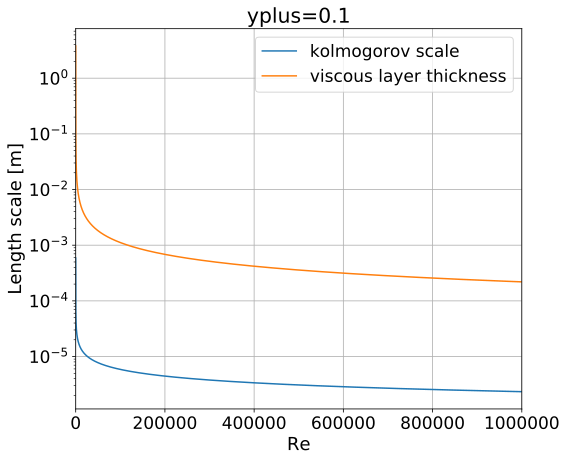

In [80]:
Re_char  = np.linspace(1,1000000,1000001) #start = 0, stop = 100, num = 5)
rho = 1000 
nu =  0.000001            # m^2/s
X  =  1                   # [m]
U  =  Re_char*nu/X                 #[m/s] 


yPlus_1=0.1
yPlus_2=1
yPlus_3=7
yPlus_4=60

# viscous length scale (y): [m]

C_f =0.058*Re_char**(-0.2)       # for known Reynolds number
tau = 0.5*C_f*rho*U              # compute the wall shear stress

results = []
for val in tau:
    u_t =math.sqrt(val/rho)     # compute the shear velocity
    results.append(u_t)
u_tt = np.hstack(results)    
    
y_1 = yPlus_1*nu/u_tt        # compute the y for known values of yplus, nu and u_t  
y_2 = yPlus_2*nu/u_tt        # compute the y for known values of yplus, nu and u_t  
y_3 = yPlus_3*nu/u_tt        # compute the y for known values of yplus, nu and u_t  
y_4 = yPlus_4*nu/u_tt        # compute the y for known values of yplus, nu and u_t  


# compute the kolomogrove length scale for indvidual Reynolds numbers 

# Integeral eddy scale (l) [meters] 
blt = (0.35*X)/((Re_char)**(1/5))
l = 0.4*blt
# Turbulence intensity (I_t)  [-]
I = 0.16*Re_char**(-1./8.)
#Turbulent kinetic energy (k)  [m^2/s^2]
k = (3/2)* (I*U)**2    # the product of the turbulence intensity and the free stream velocity 

# Turbulent dissipation rate (E)  [m^2/s^3]
e = (0.09*k**(3/2))/(l)      # for known values of l and k values

lo = ((nu**3)/e)**(1/4)      # kolomogrove length scale as function of Re_char and X

#lo = 0.7*X/(Re_char/10)**(3/4)            

plt.rcParams['figure.figsize'] = (8,7)
plt.rcParams.update({'font.size':17})
plt.semilogy(Re_char,y_1,'-',label='kolmogorov scale')
plt.semilogy(Re_char,lo,'-',label='viscous layer thickness')

plt.xlabel('Re',fontsize=18)
plt.ylabel('Length scale [m]',fontsize=18)
plt.xlim(0,1000000)
plt.title('yplus=0.1')
#plt.ylim(0.000001,0.001)
plt.grid()

plt.legend(loc=0)

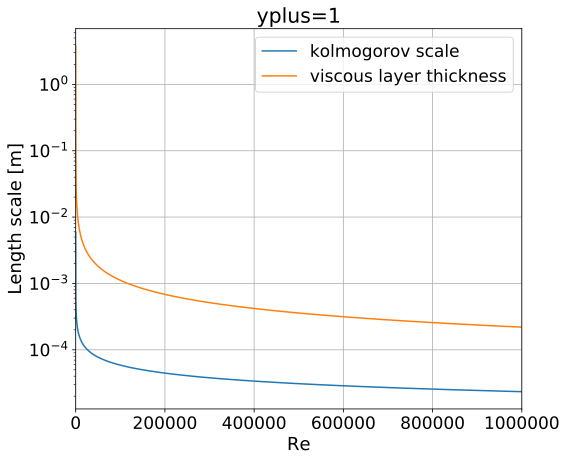

In [81]:
plt.rcParams['figure.figsize'] = (8,7)
plt.rcParams.update({'font.size':17})
plt.semilogy(Re_char,y_2,'-',label='kolmogorov scale')
plt.semilogy(Re_char,lo,'-',label='viscous layer thickness')

plt.xlabel('Re',fontsize=18)
plt.ylabel('Length scale [m]',fontsize=18)
plt.xlim(0,1000000)
plt.title('yplus=1')
#plt.ylim(0.000001,0.001)
plt.grid()

plt.legend(loc=0)

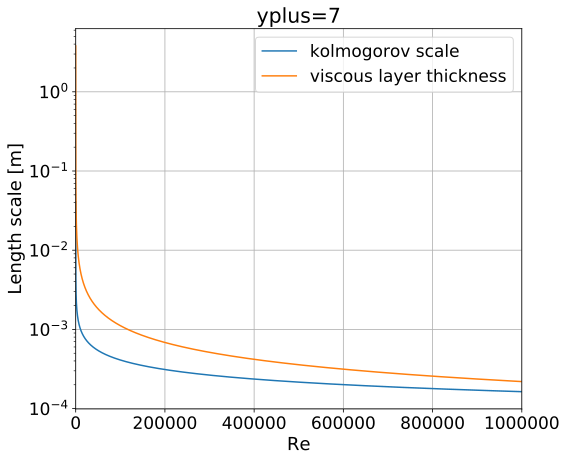

In [82]:
plt.rcParams['figure.figsize'] = (8,7)
plt.rcParams.update({'font.size':17})
plt.semilogy(Re_char,y_3,'-',label='kolmogorov scale')
plt.semilogy(Re_char,lo,'-',label='viscous layer thickness')

plt.xlabel('Re',fontsize=18)
plt.ylabel('Length scale [m]',fontsize=18)
plt.xlim(0,1000000)
plt.title('yplus=7')
#plt.ylim(0.000001,0.001)
plt.grid()

plt.legend(loc=0)

# Question 2.1

### Can the Kolmogorov eddies become smaller than the viscous sublayer height? Try different combinations of input values.

## Answer
### No, It can not be. This can be demonstrated by taking yplus values in the viscous layer and ploting the resulting length scale to a similar Reynolds but kolomgorove scale. In all cases, the Kolmogorov length should be higher than the viscous layer.  I were not able to achieve this on the plot because of a problm on how the klomogorove scale is defined. 

# Question 2.2:
### What will happen if you choose a y+ value equal to 60? Is this value still in the viscous sublayer? Are the Kolmogorov eddies smaller or larger?

## Answer 
### In this condition, it is likely that the Kolmogorov scale would be plotted lower than the a yplus of 60 as this value is in the turbulent layer region and its eddie lengths are larger in comparison to kolmogorov eddies. I were not able to achieve this on the plot because of a problm on how the klomogorove scale is defined. 

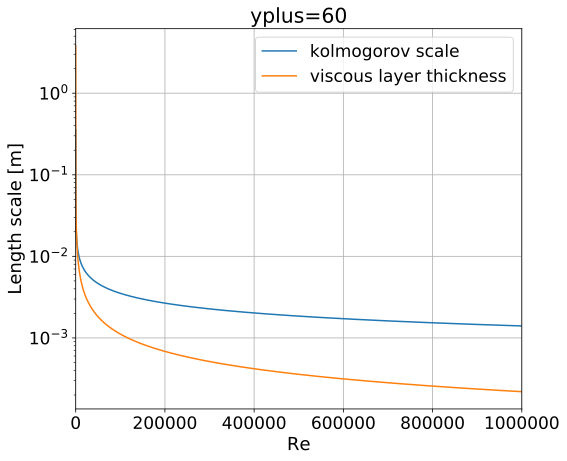

In [83]:
plt.rcParams['figure.figsize'] = (8,7)
plt.rcParams.update({'font.size':17})
plt.semilogy(Re_char,y_4,'-',label='kolmogorov scale')
plt.semilogy(Re_char,lo,'-',label='viscous layer thickness')

plt.xlabel('Re',fontsize=18)
plt.ylabel('Length scale [m]',fontsize=18)
plt.xlim(0,1000000)
plt.title('yplus=60')
#plt.ylim(0.000001,0.001)
plt.grid()

plt.legend(loc=0)